# Catfish Sales Forecasting Model:

Project Objective: Developing a predecitve model for forecasting the sales of catfish based on the previous year seasonal patterns.
    
Algorithms applied: SARIMA (Seasonal Autoreggressive Integrated Moving Average) 



In [47]:
# Loading libraries:
import numpy as np
import pandas as pd


In [48]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from datetime import timedelta
from time import time

In [49]:
import seaborn as sns

In [50]:
sns.set_style('whitegrid')

In [51]:
# Getting the sales Data
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [52]:
# Reading the dateset
Catfish_Sales = pd.read_csv('catfish.csv',parse_dates=[0],index_col=0, date_parser=parser)
Catfish_Sales

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


In [53]:
# Infering the frequency od dATA
Catfish_Sales = Catfish_Sales.asfreq(pd.infer_freq(Catfish_Sales.index))
print(Catfish_Sales)

            Total
Date             
1986-01-01   9034
1986-02-01   9596
1986-03-01  10558
1986-04-01   9002
1986-05-01   9239
...           ...
2012-08-01  14442
2012-09-01  13422
2012-10-01  13795
2012-11-01  13352
2012-12-01  12716

[324 rows x 1 columns]


In [54]:
Start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_Catfish_Sales = Catfish_Sales[Start_date:end_date]
lim_Catfish_Sales

,Total
Date,
1996-01-01,20322
1996-02-01,20613
1996-03-01,22704
1996-04-01,20276
1996-05-01,20669
1996-06-01,18074
1996-07-01,18719
1996-08-01,20217
1996-09-01,19642


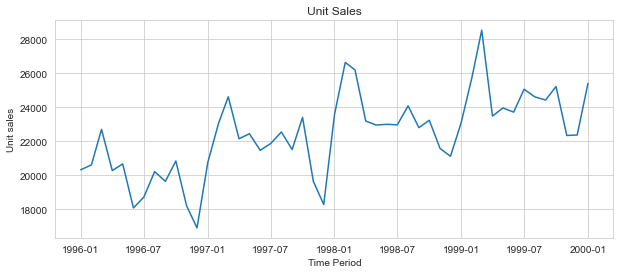

In [55]:
plt.figure(figsize=(10,4))
plt.plot(lim_Catfish_Sales)
plt.xlabel('Time Period')
plt.ylabel('Unit sales')
plt.title('Unit Sales')
plt.show()

# Removing The Trend:
For this, we will be subtracting the data point of the sales of the prior month for each year.

In [56]:
first_diff = lim_Catfish_Sales.diff()[1:]

Text(0, 0.5, 'Sales Trend')

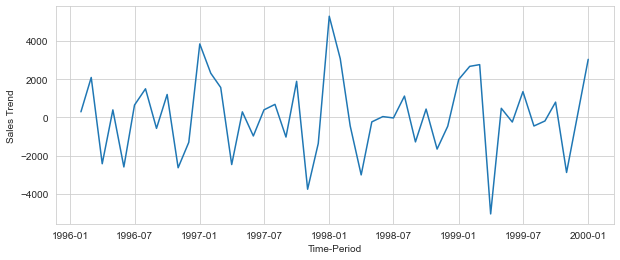

In [57]:
plt.figure(figsize=(10,4))
plt.plot(first_diff )
plt.xlabel('Time-Period')
plt.ylabel('Sales Trend')
# Therefore, we have taken the first difference that is the intrgrated order of 1. Therefore, the first difference is making it statiniary.

# ACF

Text(0, 0.5, 'Correlation')

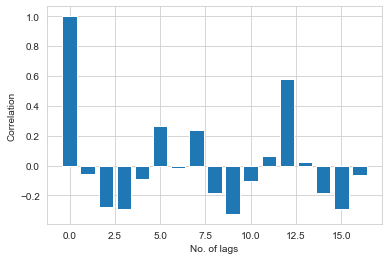

In [58]:
acf_vals = acf(first_diff)
num_lags = 17
plt.bar(range(num_lags), acf_vals[:17])
plt.xlabel('No. of lags')
plt.ylabel('Correlation')

# At 12, we observe a significant lag, therefore based on ACF we should start with seasonal MA process.

# PACF

Text(0, 0.5, 'Impact of Immediate Lags')

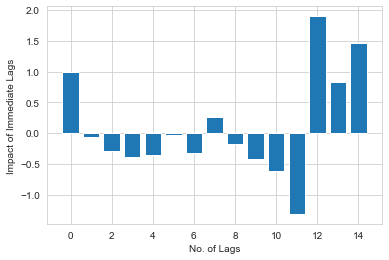

In [59]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags),pacf_vals[:num_lags])
plt.xlabel('No. of Lags')
plt.ylabel('Impact of Immediate Lags')

# Therefore, due to huge spike at 12, the model should move on with seasonal AR process.

In [60]:
# Getting the training and testing datasets:

In [61]:
# Timedelta adds the number of days to the current date.
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

train_data = lim_Catfish_Sales[:train_end]
test_data = lim_Catfish_Sales[train_end + timedelta(days=1):test_end]

In [62]:
# Fitting the SARIMA model

In [63]:
my_order = (0,1,0) ### Regular AR and MA that are non seasnal thre the random walk model.
my_seasonal_order = (1,0,1,12) ## Seasonal compnonent and since our data is monthly, threrefore the number of observations we will be having shall be 12.

In [64]:
# Defining the model:
Model = SARIMAX(train_data,order= my_order, seasonal_order= my_seasonal_order)

In [65]:
# Fitting the model:
start = time()
model_fit = Model.fit()
end = time()
print('Model Fitting Time:', end - start)

C:\Users\kanis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\kanis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model Fitting Time: 0.32939910888671875


In [66]:
# Summary of Model Parameters:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Total   No. Observations:                   43
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -365.635
Date:                              Wed, 19 Jun 2024   AIC                            737.269
Time:                                      13:33:32   BIC                            742.482
Sample:                                  01-01-1996   HQIC                           739.180
                                       - 07-01-1999                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8250      0.120      6.848      0.000       0.589       1.061
ma.S.L12      -0.51

In [71]:
# Getting the predictions:
predictions = model_fit.predict(len(test_data))
#predictions = pd.Series(predictions, index = test_data.index)
#residuals = test_data - predictions
predictions = pd.DataFrame(predictions)
predictions

,predicted_mean
Date,
1996-07-01,18074.000000
1996-08-01,18719.000000
1996-09-01,20217.000000
1996-10-01,19642.000000
1996-11-01,20842.000000
1996-12-01,18204.000000
1997-01-01,22908.491702
1997-02-01,20869.432008
1997-03-01,23944.928968


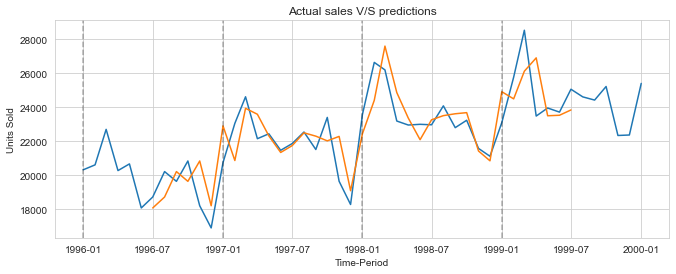

In [74]:
# Actual sales V/S predictions:
plt.figure(figsize=(11,4))
plt.plot(lim_Catfish_Sales)
plt.plot(predictions)
plt.title('Actual sales V/S predictions')
plt.xlabel('Time-Period')
plt.ylabel('Units Sold')
for year in range(Start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color = 'k', linestyle='--',alpha=0.3)
    

# Insight:

Therefore, the sales of the catfish is expected to be increased upto 23847 units.  